<a href="https://colab.research.google.com/github/klarcika/TZ/blob/main/Ponovitev_vsega.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ponavljanje vsega kar sem se naucila pri Tehnologijah znanja;![catplot.png](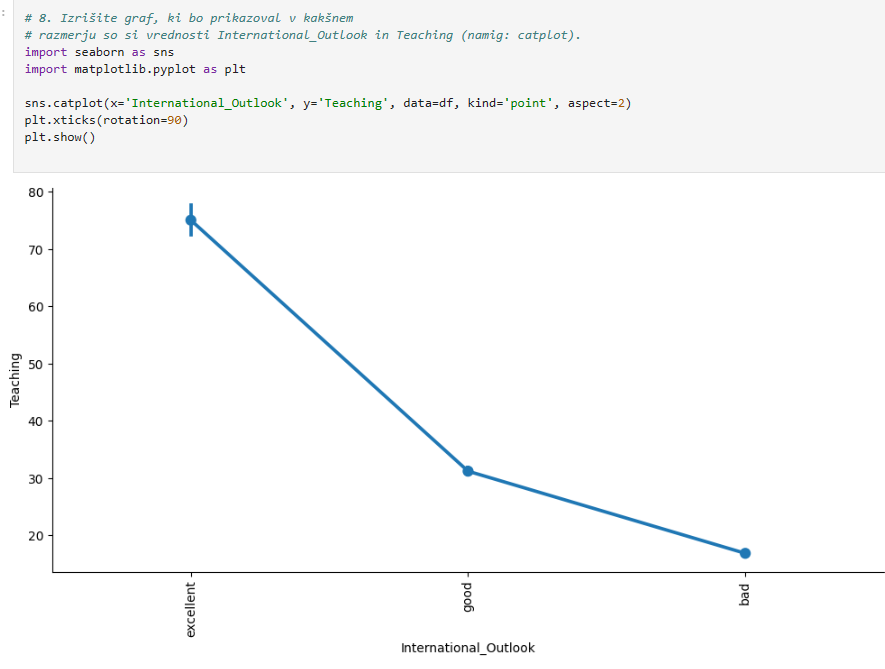![lineplot.png](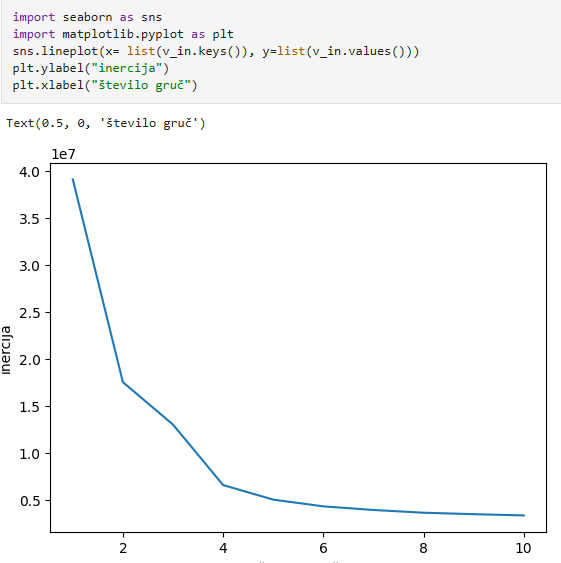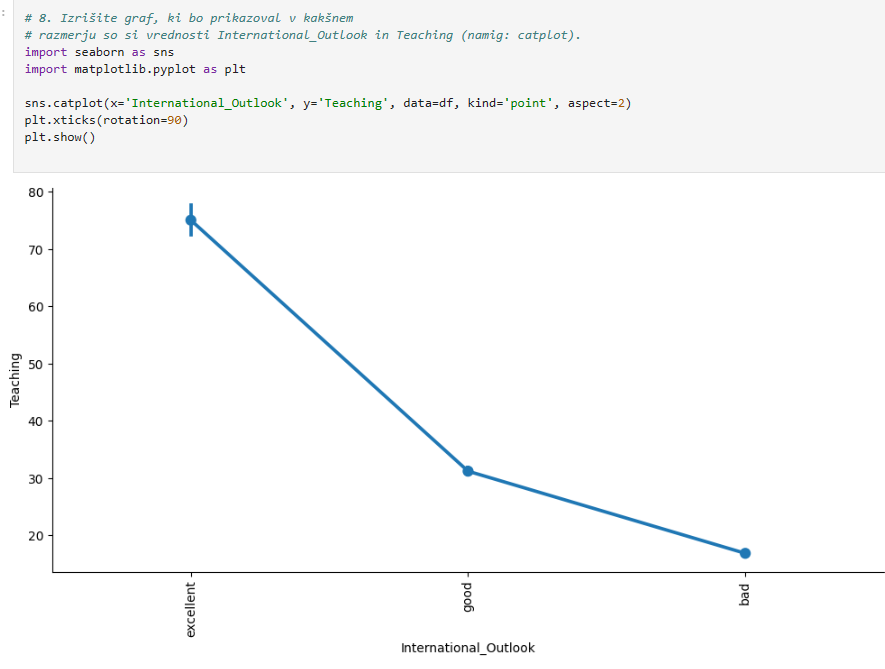))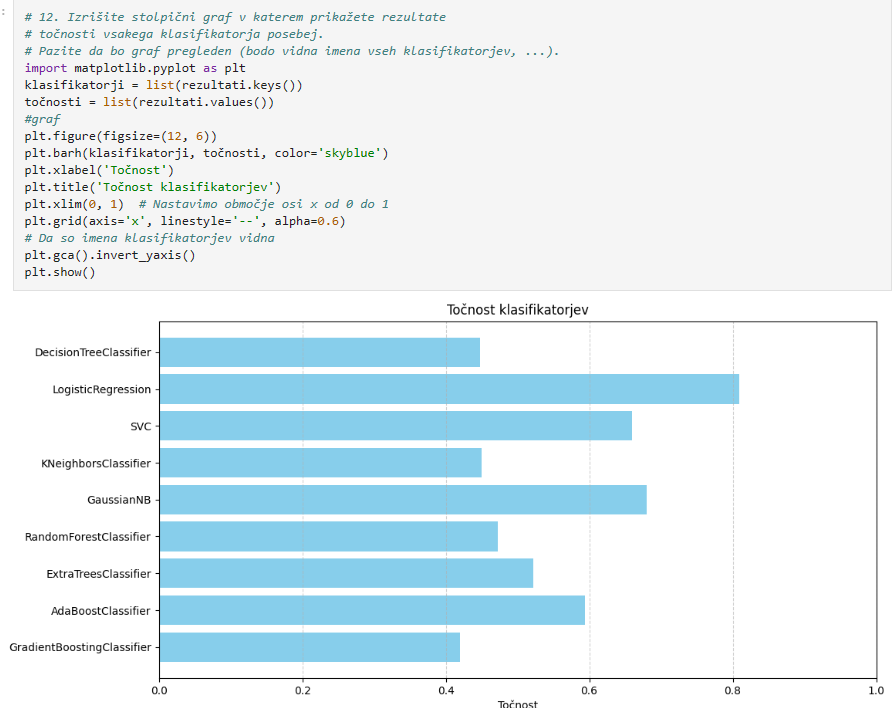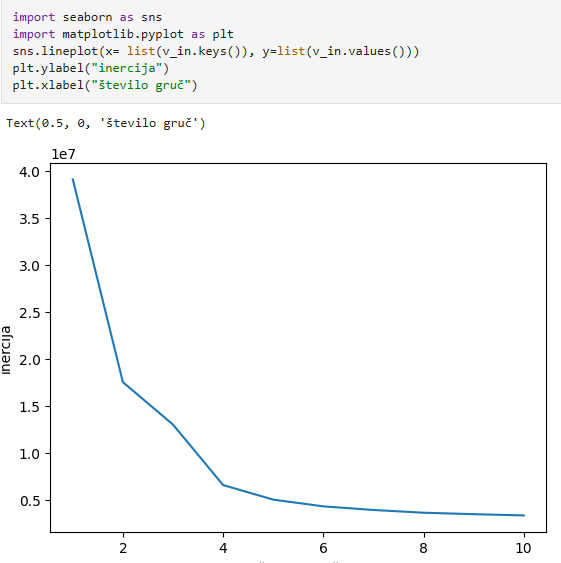

In [20]:
import pandas as pd
df=pd.read_csv("university_rank_2020.csv" , sep=",")

v primeru da imamo excel datoteko jo preberemo tako;

*df_sell= pd.read_excel("housing_sell.xlsx", index_col=0, sep="\t", sheet_name=0)*


In [24]:
df.describe() #opise naso zbirko

,Number_students,Numb_students_per_Staff,Score_Result,Rank
count,1396.000000,1396.000000,1396.000000,1396.000000
mean,29.114481,18.966905,34.794054,315.304441
std,73.442621,16.835492,16.946075,140.946223
min,1.078000,0.900000,10.700000,1.000000
25%,10.430500,12.375000,21.000000,212.000000
50%,18.207500,16.350000,31.600000,336.000000
75%,29.687750,21.900000,44.500000,437.000000
max,973.000000,493.500000,95.400000,535.000000


In [22]:
df.dtypes #tipi v nasem df

University                  object
Country                     object
Number_students            float64
Numb_students_per_Staff    float64
Score_Result               float64
Rank                         int64
dtype: object

In [40]:
df.shape #izpise koliko je vseh instanc in koliko je stolpcev

(1396, 6)

In [36]:
df.head() #izpisemo prvih 5

,University,Country,Number_students,Numb_students_per_Staff,Score_Result,Rank
0,University of Oxford,United Kingdom,20.664,11.2,95.4,1.0
1,California Institute of Technology,United States,2.240,6.4,94.5,2.0
2,University of Cambridge,United Kingdom,18.978,10.9,94.4,3.0
3,Stanford University,United States,16.135,7.3,94.3,4.0
4,Massachusetts Institute of Technology,United States,11.247,8.6,93.6,5.0


In [37]:
df.tail() #izpisemo zadnjih 5 vrednosti

,University,Country,Number_students,Numb_students_per_Staff,Score_Result,Rank
1391,Cear� State University,Brazil,20.174,17.8,11.3,531.0
1392,Pontifical Catholic University of Minas Gerais,Brazil,34.101,21.3,11.2,532.0
1393,Bashkir State University,Russian Federation,15.236,11.1,11.1,533.0
1394,University of Caxias do Sul,Brazil,17.101,24.9,11.0,534.0
1395,Tokyo Denki University,Japan,9.285,25.6,10.7,535.0


In [ ]:
df[:5] #prvih 5
df[5:] #zadnjih 5

In [23]:
df.isnull().sum() #pogledamo koliko je manjkajocih vrednosti

University                 0
Country                    0
Number_students            0
Numb_students_per_Staff    0
Score_Result               0
Rank                       0
dtype: int64

In [ ]:
#-------------------------dopolnjevanj null vrednosti---------------

če imamo manjkajoce vrednosi, jih lahko dopolnimo, pri številskih z *mean*, pri kategoricnih z *most frequent*

In [42]:
stevilski=df.select_dtypes(exclude=["object"]).columns
kategoricni=df.select_dtypes(include=["object"]).columns

In [29]:
#Manjkajoče številske vrednosti lahko dopolnimo z Simple imputer
import numpy as np
from sklearn.impute import SimpleImputer
povprecje= SimpleImputer(missing_values=np.nan, strategy="mean")
df[stevilski]=povprecje.fit_transform(df[stevilski])

In [32]:
#manjkajoce kategoricne vrednosti lahko dopolnimo s kategorical imputer
from sklearn_pandas import CategoricalImputer
najpogostejsi=CategoricalImputer(missing_values=np.nan, strategy="most_frequent")
df[kategoricni]=najpogostejsi.fit_transform(df[kategoricni])

In [ ]:
#---------------pretvorba podatkov-----------------

Odvisno kaksne metode ucenja uporabljamo, taksni morajo biti nasi podatki, npr. moramo vse spremeniti stevilske;
- label encoder
-  dummy vrednosti

In [33]:
df1=df.copy(deep=True) #kopiramo dataset, ni nujno!
from sklearn.preprocessing import LabelEncoder
for k in kategoricni:
  df1[k]= LabelEncoder().fit_transform(df1[k])

In [38]:
df2= df.copy(deep=True)
df2=pd.get_dummies(df, columns=kategoricni)

In [ ]:
#standardizacija številskih podatkov
from sklearn.preprocessing import StandardScaler
df[stevilski]=StandardScaler().fit_transform(df[stevilski])

Ko preuredimo vse podatke zacnemo te uciti na nasem modelu;
- klasifikacija
- regresija
- grucenje

----
pri tem lahko uporabimo;
-  bayesev algoritem
- knn
- decision tree
- svm
- random forest classifier


###klasifikacija

In [44]:
#podatke razdelimo na test in train
from sklearn.model_selection import train_test_split
izhod= "Rank"#spremenljivka ki jo napovedujemo
vhod=df.drop(izhod, axis=1)

x_train, x_test, y_train, y_test= train_test_split(df[vhod], df[izhod], test_size=0.3,random_state=123)

In [44]:
#------------random forest classifier----------
from sklearn.ensemble import RandomForestClassifier
model=  RandomForestClassifier()
model.fit(x_train, y_train)
prediction= model.predict(x_test)

In [ ]:
#----------------KNN algoritem-------------
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
izhod="Type"
df_izhod=df1["Type"]
df_vhod= df1.drop(izhod, axis=1)

kfold=StratifiedKFold(n_splits=5)
rezultat= cross_val_score(KNeighborsClassifier(n_neighbors=5), df_vhod, df_izhod, cv=kfold, scoring="accuracy")

print(prediction.mean())

Ko smo model dobili ga lahko ovrednostimo z posebnimi metrikami;
- accuracy
- sensitivity
- f1
- recall
- precision
- metrika zmede
- navzkrižna validacija: uporabimo ce imamo malo podatkov v df
- kfolds

In [41]:
#-------------------uporabimo metrike vrednotenja:------------------------
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score
from sklearn import metrics
accuracy = metrics.accuracy_score(prediction, y_test)
precision = precision_score(y_test, prediction, average='macro', zero_division=1)
recall = recall_score(y_test, prediction, average='macro', zero_division=1)
f1= f1_score(y_test, prediction, average="macro", zero_division=1)
print("F1 ocena: ", f1)

In [ ]:
#---------------------grid search-------------------
from sklearn.model_selection import GridSearchCV
parametri={
    'n_neighbours': [1, 3, 5,  10], 'algorithm': ['ball_tree', 'kd_tree']  #parametri in nabor vrednosti
    #zelimo kartero povprecje teh foldov bo imel najboljso vrednost
}
grid_k= GridSearchCV(KNeighborsClassifier(), parametri, cv=10, scoring="accuracy")
grid_k.fit(df_vhod, df_izhod)
print(grid_k.best_params_)
print(grid_k.best_score_) #rezultat
print(grid_k.best_estimator_)#najboljsa uporaba/ nastavitev
#grid : parametre vzame da jih testira in naredi kombinacijo vsakega z vsakim


In [ ]:
#---------------------- Random Search CV----------------------------
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import sp_radint #statisticna knjiznica v pythonu
parametri={    #nakljucne vrednsoti od 1-5
    'n_neighbours': sp_radint(1,5), 'algorithm': ['ball_tree', 'kd_tree']  #parametri in nabor vrednosti
    #zelimo kartero povprecje teh foldov bo imel najboljso vrednost
}
rand_k= RandomizedSearchCV(KNeighborsClassifier(),param_distributions= parametri, cv=10,n_iter=10, scoring="accuracy")
 #št iteracij moremo nastavit, da omejimo da ne gre v nedogled; ker randomize nakljucn mece not parametre, da bi bili najboljsi za ta klasifikator
rand_k.fit(df_vhod, df_izhod)
print(rand_k.best_params_) #kateri je najbolji algoritem za uporabo
print(rand_k.best_score_) #rezultat
print(rand_k.best_estimator_)#najboljsa uporaba/ nastavitev

##Grucenje
uporabimo dendogram da vidimo koliko fgruc bi bilo najbolje uporabit, po pravilu komolca(kjer je prvi vecji prelom, tisto gruco izberemo)

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
razdalje=linkage(stevilski, "single")
dendrogram(razdalje, orientation="top", p=5, truncate_mode='level')

In [ ]:
#-------------kmeans algoritem--------------
#algoritem razdeli df na gruce, v nasem primeru 2
from sklearn import metrics
from sklearn.cluster import KMeans
km= KMeans(n_clusters=2, random_state=0)
km.fit(stevilski)
gruce= km.labels_
st_instanc = {i: sum(gruce == i) for i in range(2)}
print("Število instanc v posamezni gruči:", st_instanc)


In [ ]:
#transformacija podatkov => podatke moremo potem dati nazaj v data frame obliko
from sklearn.decomposition import PCA
# Uporabi PCA na celotnih podatkih
pca = PCA(n_components=2)
transformirani_podatki = pca.fit_transform(stevilski)

# Pridobimo oznake gruč za vsako instanco
km.labels_

# Ustvarimo DataFrame za prikaz rezultatov
df_pca = pd.DataFrame(data=transformirani_podatki, columns=['col1', 'col2'])


##Regresija
pretvorimo kategoricne podatke v stevilske, razen izhodnega stolpca, ki ga napovedujemo
stevilske pa standardiziramo


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

izhod="Rank"
vhod = df.drop(izhod, axis=1)

x_train, x_test, y_train, y_test = train_test_split(vhod, izhod, test_size=0.3, random_state=789)
lr= LinearRegression()
lr.fit(x_train, y_train)
rezultat= lr.predict(x_test)
#racunamo napako
m1= mean_absolute_error(y_test, rezultat)
m2=mean_squared_error(y_test, rezultat)
r2=r2_score(y_test, rezultat)

Navsezadnje lahko dobljene podatke se predstavimo s grafi;
- heatmap
- ditplot
- catplot
- countplot / stolpcni
- barplot / stolpicni


In [ ]:
import seaborn as sns
sns.boxplot(x=df["Citations"]) # min, 1/4, povprečje, 3/4, max

sns.countplot(x=df["International_Outlook"]) # ZA KATEGORIČNE, kolikokrat se pojavi vrednost

sns.histplot(x=df["Research"], kde=False) # ZA NUMERIČNE, distribucija podatkov, da jih v intervale. KDE estimata nekaj

sns.barplot(data=df, x="Industry_Income", y="Country", palette="Blues") # Povprečje numeričnih vrednosti

sns.scatterplot(x=df["Number_students"], y=df["Score_Result"], style=df["International_Outlook"], hue=df["Country"]) # Razpršen graf, dodaš obliko in barvno, bolj samo za numerične

sns.catplot(data=df, x='International_Outlook', y='Teaching') # Povezava med kategoričnimi in numeričnimi podatki (ali dvema kategoričnima)

sns.heatmap(df.select_dtypes(include=["number"]).corr()) # Corelacija numeričnih vrednosti

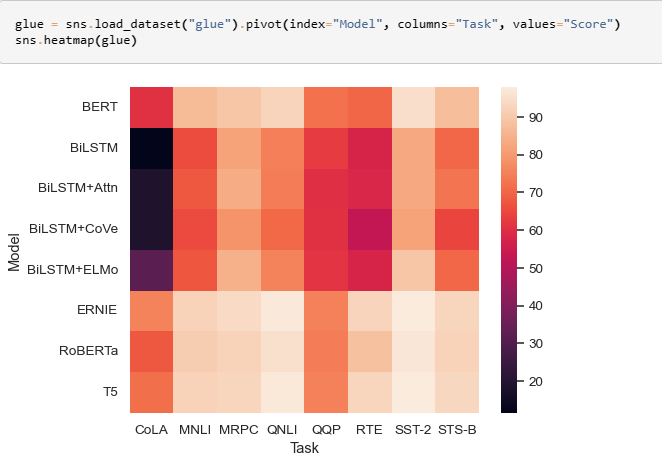

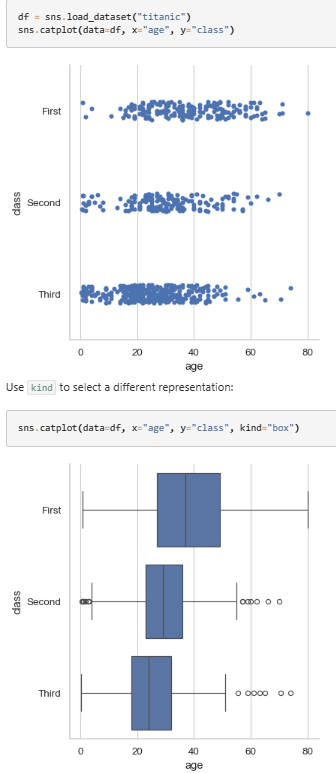

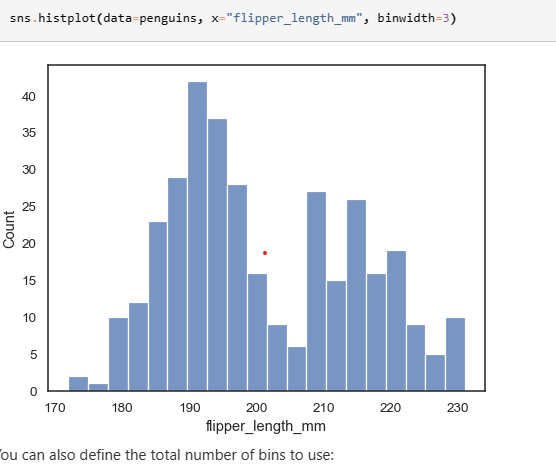

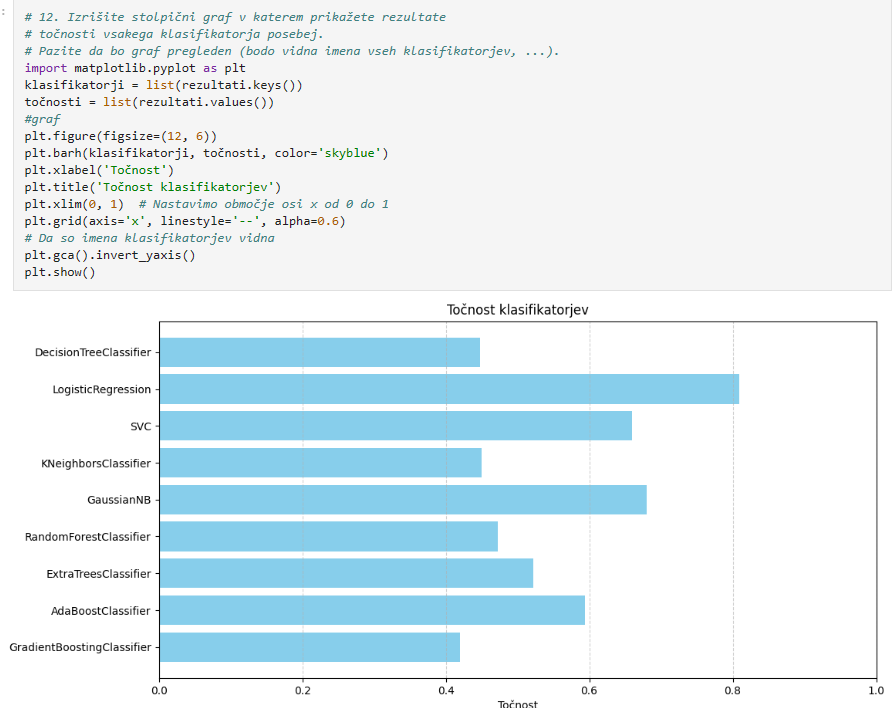

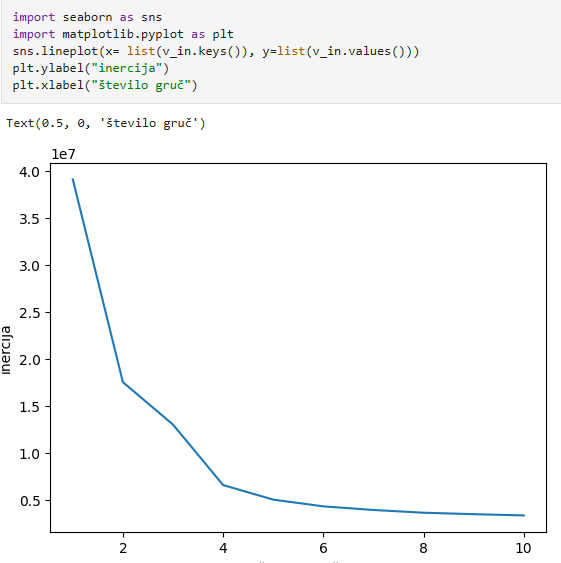

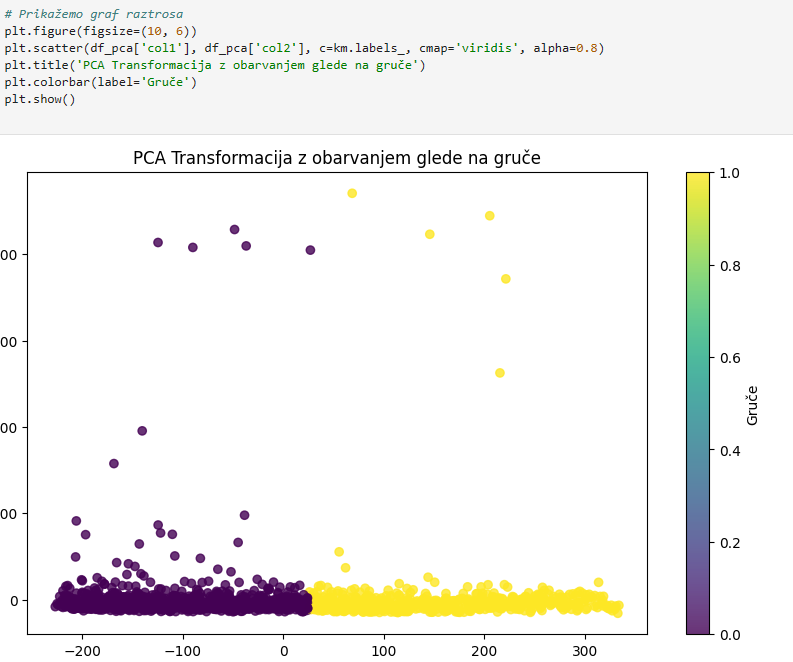